## Data Preparation

#### Import

In [ ]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms
from sklearn.svm import SVR
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from pandas.plotting import scatter_matrix
from math import sqrt

# 允许每个单元格有多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [10]:
#Load the data
df = pd.read_csv("/Users/lijiaze/Desktop/2022-2/CITS5553/model/wba_data_CLEAN.csv")


#View the data
df.head()

Unnamed: 0  Subject  Gender      AgeY   ECV    TPP    SC  TympType  OAE1  \
0           0        8       0  9.333333  1.08 -189.0  0.52         1   3.0   
1           1       22       0  9.500000  1.28  -49.0  1.28         0   7.0   
2           2       24       1  9.833333  1.26  -27.0  0.87         0   9.0   
3           3       31       0  9.916667  0.64   -8.0  0.60         0  13.0   
4           4       42       0  7.916667  0.92  -17.0  1.65         0   7.0   

   OAE1.4  ...  f(6168.8433)  f(6349.6042)  f(6535.6618)  f(6727.1713)  \
0    10.0  ...        0.5370        0.4869        0.4301        0.4080   
1     4.0  ...        0.2636        0.2578        0.2443        0.2549   
2    12.0  ...        0.4269        0.4142        0.3910        0.3799   
3     9.0  ...        0.0077        0.0123        0.0066        0.0000   
4     0.0  ...        0.2332        0.2216        0.2228        0.2653   

   f(6924.2925)  f(7127.1897)  f(7336.0323)  f(7550.9945)  f(7772.2555)  \
0        0.3804        0.3291        0.2951        0.2530        0.2282   
1        0.2604        0.2397        0.2299        0.2048        0.1917   
2        0.3740        0.3536        0.3473        0.3237        0.3056   
3        0.0126        0.0231        0.0405        0.0401        0.0391   
4        0.2596        0.2576        0.2838        0.3598        0.3953   

   f(8000.0000)  
0        0.2003  
1        0.1659  
2        0.2881  
3        0.0258  
4        0.3642  

[5 rows x 123 columns]

#### Data Cleaning

In [13]:
# Remove 'Unnamed: 0' and subject column
wba_data = df.drop(["Unnamed: 0", "Subject"], axis=1)

wba_data.head()

Gender      AgeY   ECV    TPP    SC  TympType  OAE1  OAE1.4  OAE2  OAE2.8  \
0       0  9.333333  1.08 -189.0  0.52         1   3.0    10.0  18.0    14.0   
1       0  9.500000  1.28  -49.0  1.28         0   7.0     4.0   9.0     5.0   
2       1  9.833333  1.26  -27.0  0.87         0   9.0    12.0   8.0    12.0   
3       0  9.916667  0.64   -8.0  0.60         0  13.0     9.0  13.0    11.0   
4       0  7.916667  0.92  -17.0  1.65         0   7.0     0.0   2.0    12.0   

   ...  f(6168.8433)  f(6349.6042)  f(6535.6618)  f(6727.1713)  f(6924.2925)  \
0  ...        0.5370        0.4869        0.4301        0.4080        0.3804   
1  ...        0.2636        0.2578        0.2443        0.2549        0.2604   
2  ...        0.4269        0.4142        0.3910        0.3799        0.3740   
3  ...        0.0077        0.0123        0.0066        0.0000        0.0126   
4  ...        0.2332        0.2216        0.2228        0.2653        0.2596   

   f(7127.1897)  f(7336.0323)  f(7550.9945)  f(7772.2555)  f(8000.0000)  
0        0.3291        0.2951        0.2530        0.2282        0.2003  
1        0.2397        0.2299        0.2048        0.1917        0.1659  
2        0.3536        0.3473        0.3237        0.3056        0.2881  
3        0.0231        0.0405        0.0401        0.0391        0.0258  
4        0.2576        0.2838        0.3598        0.3953        0.3642  

[5 rows x 121 columns]

In [14]:
features = list(wba_data.columns)

#### Train Test Split

In [15]:
wba_data[wba_data.columns[:20]]

Gender      AgeY   ECV    TPP    SC  TympType  OAE1  OAE1.4  OAE2  \
0         0  9.333333  1.08 -189.0  0.52         1   3.0    10.0  18.0   
1         0  9.500000  1.28  -49.0  1.28         0   7.0     4.0   9.0   
2         1  9.833333  1.26  -27.0  0.87         0   9.0    12.0   8.0   
3         0  9.916667  0.64   -8.0  0.60         0  13.0     9.0  13.0   
4         0  7.916667  0.92  -17.0  1.65         0   7.0     0.0   2.0   
..      ...       ...   ...    ...   ...       ...   ...     ...   ...   
234       1  8.666667  1.18  -48.0  1.07         0  10.3    18.6  12.0   
235       0  8.666667  0.78  -17.0  0.77         0  13.2    23.5  17.3   
236       1  8.833333  0.90    2.0  1.02         0   5.3    11.0  15.3   
237       1  8.250000  0.76 -173.0  0.15         1  -3.6    -0.9  -2.4   
238       1  9.833333  0.66 -122.0  1.18         1   8.3     9.9  16.6   

     OAE2.8  OAE4  OverallPoF  Ear coded  Pressure  f(226.0000)  f(257.3256)  \
0      14.0   8.0           1          0        -1       0.0987       0.1274   
1       5.0   6.0           0          0        -4       0.1114       0.1501   
2      12.0  16.0           0          0        -4       0.1096       0.1509   
3      11.0  12.0           0          0         2       0.0748       0.0953   
4      12.0   6.0           1          0        -2       0.1863       0.2230   
..      ...   ...         ...        ...       ...          ...          ...   
234     0.5   3.7           0          1         1       0.0663       0.0736   
235    14.3   6.7           0          1        -4       0.0688       0.0738   
236    14.6  11.5           0          1        -5       0.1016       0.1186   
237     3.0   3.0           1          1        -5       0.0366       0.0414   
238    15.7  10.1           1          1         3       0.0267       0.0294   

     f(280.6155)  f(297.3018)  f(324.2099)  f(343.4884)  
0         0.1592       0.1737       0.1700       0.1617  
1         0.1860       0.2033       0.1953       0.1831  
2         0.1941       0.2156       0.2139       0.2065  
3         0.1190       0.1285       0.1233       0.1151  
4         0.2641       0.2836       0.2794       0.2685  
..           ...          ...          ...          ...  
234       0.1023       0.1360       0.1672       0.1821  
235       0.0951       0.1238       0.1484       0.1611  
236       0.1060       0.2803       0.1910       0.1980  
237       0.0577       0.0803       0.0986       0.0925  
238       0.0424       0.0599       0.0779       0.0837  

[239 rows x 20 columns]

In [35]:
# freqs = [f for f in features if f[:2] == "f("]
frequency = wba_data.iloc[:,14:138]
frequency_list = list(frequency.columns)
frequency_list

['f(226.0000)',
 'f(257.3256)',
 'f(280.6155)',
 'f(297.3018)',
 'f(324.2099)',
 'f(343.4884)',
 'f(363.9133)',
 'f(385.5527)',
 'f(408.4789)',
 'f(432.7683)',
 'f(458.5020)',
 'f(471.9372)',
 'f(500.0000)',
 'f(514.6511)',
 'f(545.2539)',
 'f(561.2310)',
 'f(577.6763)',
 'f(594.6036)',
 'f(629.9605)',
 'f(648.4198)',
 'f(667.4199)',
 'f(686.9768)',
 'f(707.1068)',
 'f(727.8266)',
 'f(749.1535)',
 'f(771.1054)',
 'f(793.7005)',
 'f(816.9577)',
 'f(840.8964)',
 'f(865.5366)',
 'f(890.8987)',
 'f(917.0040)',
 'f(943.8743)',
 'f(971.5319)',
 'f(1000.0000)',
 'f(1029.3022)',
 'f(1059.4631)',
 'f(1090.5077)',
 'f(1122.4620)',
 'f(1155.3527)',
 'f(1189.2071)',
 'f(1224.0535)',
 'f(1259.9210)',
 'f(1296.8396)',
 'f(1334.8399)',
 'f(1373.9536)',
 'f(1414.2136)',
 'f(1455.6532)',
 'f(1498.3071)',
 'f(1542.2108)',
 'f(1587.4011)',
 'f(1633.9155)',
 'f(1681.7928)',
 'f(1731.0731)',
 'f(1781.7974)',
 'f(1834.0081)',
 'f(1887.7486)',
 'f(1943.0639)',
 'f(2000.0000)',
 'f(2058.6045)',
 'f(2118.9262)

all atributes

In [30]:
attribute = wba_data.drop(columns=['OverallPoF'])
attribute_list = list(attribute.columns)
attribute_list

['Gender',
 'AgeY',
 'ECV',
 'TPP',
 'SC',
 'TympType',
 'OAE1',
 'OAE1.4',
 'OAE2',
 'OAE2.8',
 'OAE4',
 'Ear coded',
 'Pressure',
 'f(226.0000)',
 'f(257.3256)',
 'f(280.6155)',
 'f(297.3018)',
 'f(324.2099)',
 'f(343.4884)',
 'f(363.9133)',
 'f(385.5527)',
 'f(408.4789)',
 'f(432.7683)',
 'f(458.5020)',
 'f(471.9372)',
 'f(500.0000)',
 'f(514.6511)',
 'f(545.2539)',
 'f(561.2310)',
 'f(577.6763)',
 'f(594.6036)',
 'f(629.9605)',
 'f(648.4198)',
 'f(667.4199)',
 'f(686.9768)',
 'f(707.1068)',
 'f(727.8266)',
 'f(749.1535)',
 'f(771.1054)',
 'f(793.7005)',
 'f(816.9577)',
 'f(840.8964)',
 'f(865.5366)',
 'f(890.8987)',
 'f(917.0040)',
 'f(943.8743)',
 'f(971.5319)',
 'f(1000.0000)',
 'f(1029.3022)',
 'f(1059.4631)',
 'f(1090.5077)',
 'f(1122.4620)',
 'f(1155.3527)',
 'f(1189.2071)',
 'f(1224.0535)',
 'f(1259.9210)',
 'f(1296.8396)',
 'f(1334.8399)',
 'f(1373.9536)',
 'f(1414.2136)',
 'f(1455.6532)',
 'f(1498.3071)',
 'f(1542.2108)',
 'f(1587.4011)',
 'f(1633.9155)',
 'f(1681.7928)',
 

In [34]:
wba_data[attribute_list]

Gender      AgeY   ECV    TPP    SC  TympType  OAE1  OAE1.4  OAE2  \
0         0  9.333333  1.08 -189.0  0.52         1   3.0    10.0  18.0   
1         0  9.500000  1.28  -49.0  1.28         0   7.0     4.0   9.0   
2         1  9.833333  1.26  -27.0  0.87         0   9.0    12.0   8.0   
3         0  9.916667  0.64   -8.0  0.60         0  13.0     9.0  13.0   
4         0  7.916667  0.92  -17.0  1.65         0   7.0     0.0   2.0   
..      ...       ...   ...    ...   ...       ...   ...     ...   ...   
234       1  8.666667  1.18  -48.0  1.07         0  10.3    18.6  12.0   
235       0  8.666667  0.78  -17.0  0.77         0  13.2    23.5  17.3   
236       1  8.833333  0.90    2.0  1.02         0   5.3    11.0  15.3   
237       1  8.250000  0.76 -173.0  0.15         1  -3.6    -0.9  -2.4   
238       1  9.833333  0.66 -122.0  1.18         1   8.3     9.9  16.6   

     OAE2.8  ...  f(6168.8433)  f(6349.6042)  f(6535.6618)  f(6727.1713)  \
0      14.0  ...        0.5370        0.4869        0.4301        0.4080   
1       5.0  ...        0.2636        0.2578        0.2443        0.2549   
2      12.0  ...        0.4269        0.4142        0.3910        0.3799   
3      11.0  ...        0.0077        0.0123        0.0066        0.0000   
4      12.0  ...        0.2332        0.2216        0.2228        0.2653   
..      ...  ...           ...           ...           ...           ...   
234     0.5  ...        0.2221        0.1930        0.1592        0.1549   
235    14.3  ...        0.5130        0.4766        0.4316        0.4108   
236    14.6  ...        0.6157        0.5506        0.4832        0.4501   
237     3.0  ...        0.3333        0.2819        0.2302        0.2029   
238    15.7  ...        0.6628        0.5951        0.5295        0.4979   

     f(6924.2925)  f(7127.1897)  f(7336.0323)  f(7550.9945)  f(7772.2555)  \
0          0.3804        0.3291        0.2951        0.2530        0.2282   
1          0.2604        0.2397        0.2299        0.2048        0.1917   
2          0.3740        0.3536        0.3473        0.3237        0.3056   
3          0.0126        0.0231        0.0405        0.0401        0.0391   
4          0.2596        0.2576        0.2838        0.3598        0.3953   
..            ...           ...           ...           ...           ...   
234        0.1346        0.1250        0.1125        0.1242        0.1356   
235        0.3587        0.3216        0.2877        0.3026        0.2838   
236        0.3983        0.3545        0.3115        0.3136        0.2871   
237        0.1586        0.1279        0.0934        0.0612        0.0427   
238        0.4539        0.4229        0.3871        0.4081        0.3874   

     f(8000.0000)  
0          0.2003  
1          0.1659  
2          0.2881  
3          0.0258  
4          0.3642  
..            ...  
234        0.1372  
235        0.2682  
236        0.2679  
237        0.0031  
238        0.3852  

[239 rows x 120 columns]

In [38]:
data1 = wba_data[attribute_list]
data2 = wba_data[frequency_list]

target = wba_data[['OverallPoF']]

In [42]:
# Perform a random 80/20 split of the data to form a training set and a test set
X_train1,X_test1,y_train1,y_test1 = ms.train_test_split(data1,target,train_size=0.80, random_state=4)
print(len(X_train1), "train +", len(X_test1), "test")
print("X_train_shape:", X_train1.shape, " y_train_shape:", y_train1.shape)
print("X_test_shape:", X_test1.shape,"  y_test_shape:", y_test1.shape)

191 train + 48 test
X_train_shape: (191, 120)  y_train_shape: (191, 1)
X_test_shape: (48, 120)   y_test_shape: (48, 1)


In [39]:
# Perform a random 80/20 split of the data to form a training set and a test set
X_train2,X_test2,y_train2,y_test2 = ms.train_test_split(data2,target,train_size=0.80, random_state=4)
print(len(X_train2), "train +", len(X_test2), "test")
print("X_train_shape:", X_train2.shape, " y_train_shape:", y_train2.shape)
print("X_test_shape:", X_test2.shape,"  y_test_shape:", y_test2.shape)

191 train + 48 test
X_train_shape: (191, 107)  y_train_shape: (191, 1)
X_test_shape: (48, 107)   y_test_shape: (48, 1)


#### Visulization Function

In [107]:
def assess_freqs(wba_data, freq_cols, selected, title = "Selected Frequencies"):
    """
    wba_data: Full dataset
    freq_cols: List of all frequency column names
    selected: List of selected frequencies
    """

    # Creating melted dataframe (long format) for plotting
    overall_pof_df = wba_data[['OverallPoF'] + freq_cols]
    overall_pof_df = overall_pof_df.replace({'OverallPoF':{0: 'Pass', 1: 'Fail'}})
    overall_pof_df = overall_pof_df.groupby('OverallPoF').mean()
    overall_pof_df = overall_pof_df.melt(ignore_index=False)
    overall_pof_df = overall_pof_df.reset_index()

    # Plotting
    ax = sns.pointplot(x='variable', y='value', hue='OverallPoF', data=overall_pof_df)

    # Adding vertical lines at selected frequencies
    position = 0
    for freq in freq_cols:
        if freq in selected:
            ax.axvline(x=position, ls='--', color='red')
        position += 1

    sns.set(rc={'figure.figsize':(20,10)})

    # Rotate x-axis labels
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

    ax.set(title = title)

    # Show only every 2 tick labels on x-axis
    # plt.setp(ax.get_xticklabels()[::2], visible=False)

    plt.tight_layout()
    plt.show();


## Feature Selection Methods

### Method1: Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

uses the chi-squared (chi²) statistical test for non-negative features to select 20 of the best features from the Frequency.

统计检验用于选择与输出变量关系最强的那些特征。
scikit-learn 库提供了 SelectKBest 类，该类可以与一组不同的统计测试一起使用，以选择特定数量的特征。
下面的示例使用非负特征的卡方 (chi2) 统计检验从 Frequency 中选择 20 个最佳特征预测数据集。

#### Import

In [59]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Fit Model

In [64]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train2,y_train1) # X_train2 must be non-negative.

In [65]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train2.columns)

In [66]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [67]:
featureScores

Specs     Score
0     f(226.0000)  0.135900
1     f(257.3256)  0.162866
2     f(280.6155)  0.177647
3     f(297.3018)  0.197049
4     f(324.2099)  0.202974
..            ...       ...
102  f(7127.1897)  0.007738
103  f(7336.0323)  0.033673
104  f(7550.9945)  0.158550
105  f(7772.2555)  0.234300
106  f(8000.0000)  0.406392

[107 rows x 2 columns]

#### Show Result

In [106]:
f=featureScores.nlargest(20,'Score')
f1=f['Specs']
f1_list=f1.to_list()
print(featureScores.nlargest(20,'Score'))  #print 20 best features

           Specs     Score
41  f(1224.0535)  5.029906
42  f(1259.9210)  4.993849
45  f(1373.9536)  4.549014
43  f(1296.8396)  4.433097
46  f(1414.2136)  4.341530
44  f(1334.8399)  4.340269
40  f(1189.2071)  4.195252
54  f(1781.7974)  4.108555
53  f(1731.0731)  3.894847
47  f(1455.6532)  3.715019
49  f(1542.2108)  3.471970
48  f(1498.3071)  3.442717
39  f(1155.3527)  3.326124
50  f(1587.4011)  3.251953
55  f(1834.0081)  3.155744
38  f(1122.4620)  3.078135
52  f(1681.7928)  2.969252
51  f(1633.9155)  2.868053
37  f(1090.5077)  2.858435
35  f(1029.3022)  2.802399


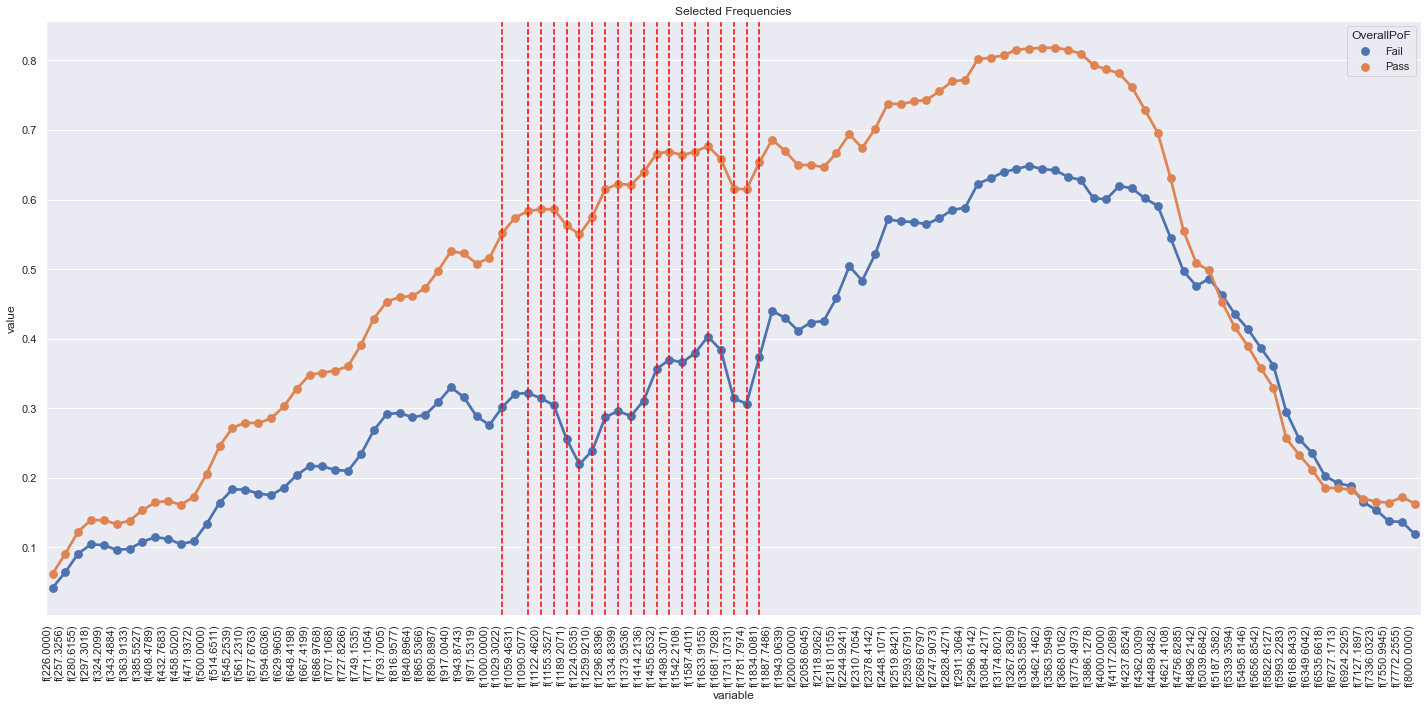

In [134]:
assess_freqs(wba_data, frequency_list, f1_list)

### Methods2: Feature Importance based on Tree

We can get the feature importance of each feature of dataset by using the feature importance property of the model. 

Feature importance gives a score for each feature of data, the higher the score more important or relevant is the feature towards the output variable. 

Feature importance is an inbuilt class that comes with Tree Based Classifiers, so we will be using Extra Tree Classifier for extracting the top 20 features for the dataset.

您可以使用模型的特征重要性属性来获取数据集每个特征的特征重要性。
特征重要性为您的数据的每个特征提供一个分数，分数越高越重要或相关的是与您的输出相关的功能多变的。
特征重要性是基于树的分类器附带的内置类，我们将使用额外的树分类器来提取前 20 个数据集的特征。

#### Import and Fit Model

In [136]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train2,y_train2)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ExtraTreesClassifier()

In [137]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00643754 0.00470829 0.00557894 0.00671343 0.00493611 0.00595504
 0.00555369 0.0071254  0.00535866 0.00571131 0.00687003 0.00333773
 0.00905028 0.00321207 0.0052858  0.00916413 0.00648624 0.00884662
 0.00927018 0.00920316 0.0061027  0.00701527 0.00440026 0.00768949
 0.00741676 0.00983579 0.00714239 0.0156276  0.01160303 0.00940592
 0.01716375 0.016688   0.01207087 0.01124044 0.01930568 0.01554276
 0.036513   0.00900976 0.0174276  0.02612867 0.01945721 0.02652509
 0.00686517 0.01186104 0.01931639 0.03493998 0.03461038 0.02240481
 0.01417618 0.02063932 0.03304203 0.01581116 0.01292535 0.01686922
 0.01716068 0.0062416  0.01068887 0.01210215 0.01264116 0.00806257
 0.00390223 0.00912135 0.00650351 0.00390603 0.00797733 0.00876636
 0.00566664 0.00409324 0.00709981 0.01141463 0.00656614 0.00340076
 0.00476803 0.00843738 0.00442976 0.00594396 0.00317699 0.00286841
 0.00609695 0.00223809 0.00383848 0.0031714  0.00510164 0.00464177
 0.00289007 0.00436318 0.00490968 0.00203676 0.00420363 0.0050

In [150]:
X_train2.columns

Index(['f(226.0000)', 'f(257.3256)', 'f(280.6155)', 'f(297.3018)',
       'f(324.2099)', 'f(343.4884)', 'f(363.9133)', 'f(385.5527)',
       'f(408.4789)', 'f(432.7683)',
       ...
       'f(6168.8433)', 'f(6349.6042)', 'f(6535.6618)', 'f(6727.1713)',
       'f(6924.2925)', 'f(7127.1897)', 'f(7336.0323)', 'f(7550.9945)',
       'f(7772.2555)', 'f(8000.0000)'],
      dtype='object', length=107)

#### Show Result

<AxesSubplot:>

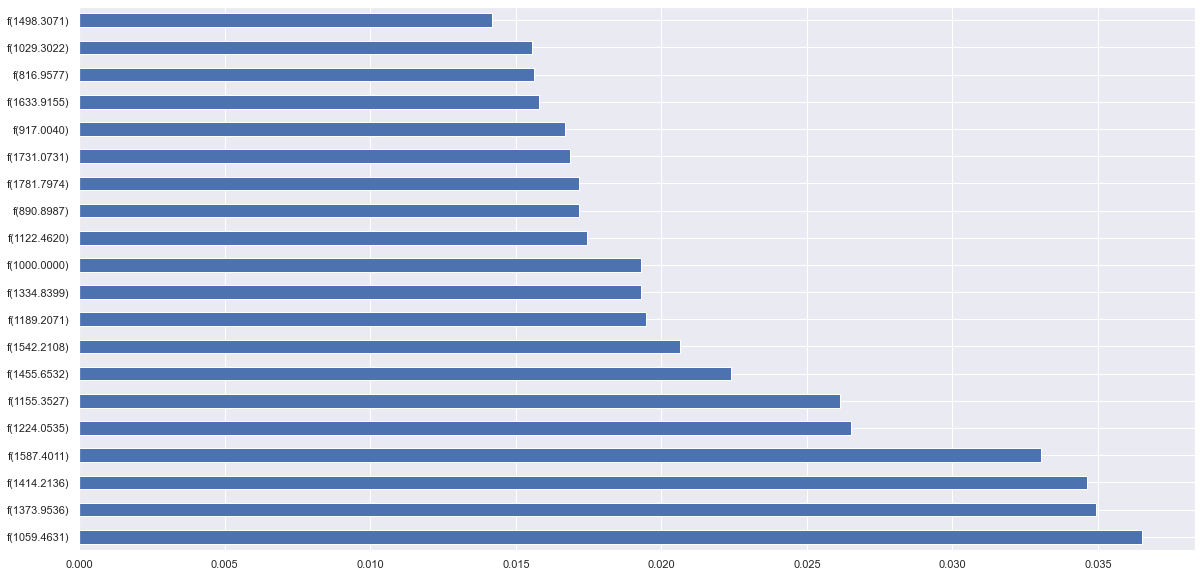

In [138]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train2.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

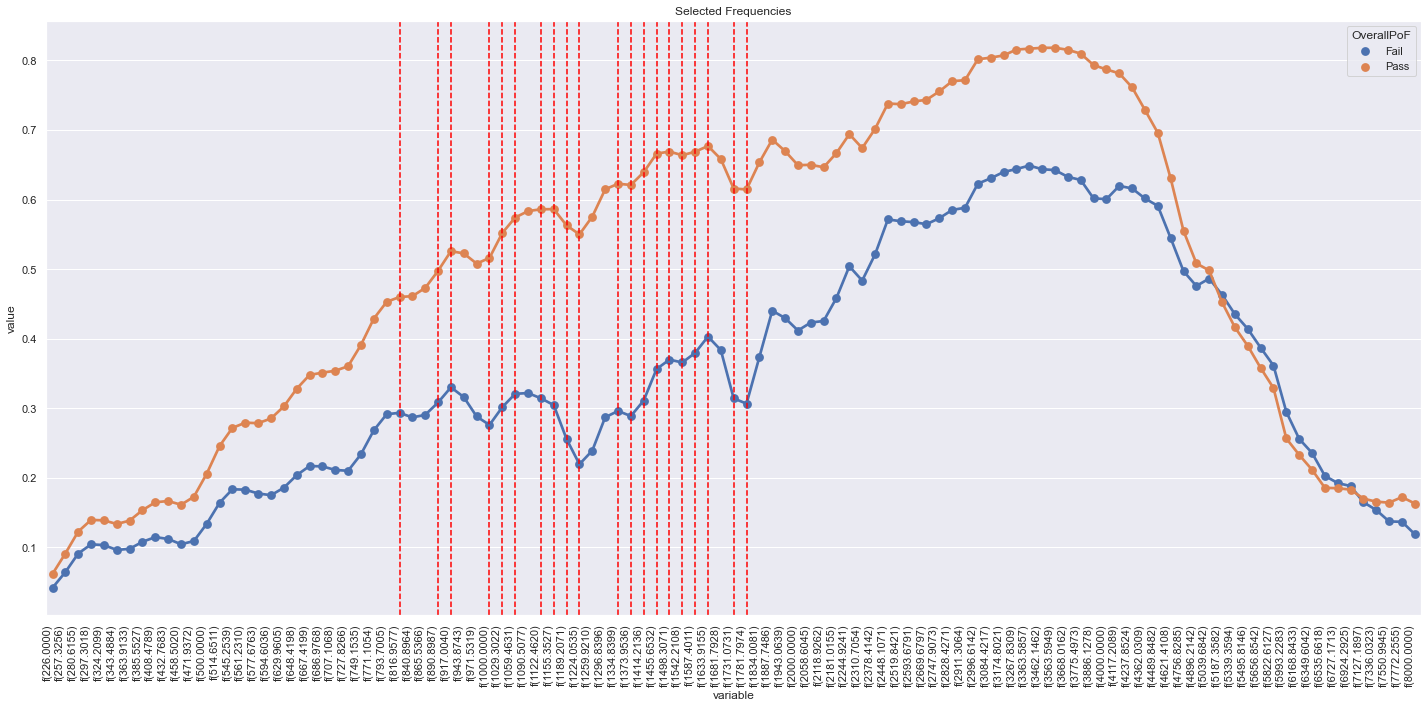

In [156]:
f2_list=feat_importances.nlargest(20).index.to_list()
assess_freqs(wba_data, frequency_list, f2_list)

### Method3: Feature Selection Using the F-Test in Scikit-learn

#### Import

In [159]:
import pandas as pd
from sklearn.datasets import fetch_openml
import category_encoders as ce

from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif

#### Fit Model

Start with 107 features.

In [80]:
X_train2.shape

(191, 107)

#### Select the top 20 features.

Note, f_classif is used as this is a classification problem. For a regression problem, use f_regression instead.

In [160]:
selector = SelectKBest(f_classif, k=20)
X_reduced = selector.fit_transform(X_train2, y_train2)
X_reduced.shape


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


(191, 20)

#### Show Result

The function get_support can be used to generate the list of features that were kept.

In [161]:
cols = selector.get_support(indices=True)
selected_columns1 = X_train2.iloc[:, cols].columns.tolist()
selected_columns1


['f(1090.5077)',
 'f(1122.4620)',
 'f(1155.3527)',
 'f(1189.2071)',
 'f(1224.0535)',
 'f(1259.9210)',
 'f(1296.8396)',
 'f(1334.8399)',
 'f(1373.9536)',
 'f(1414.2136)',
 'f(1455.6532)',
 'f(1498.3071)',
 'f(1542.2108)',
 'f(1587.4011)',
 'f(1633.9155)',
 'f(1681.7928)',
 'f(1731.0731)',
 'f(1781.7974)',
 'f(1834.0081)',
 'f(1887.7486)']

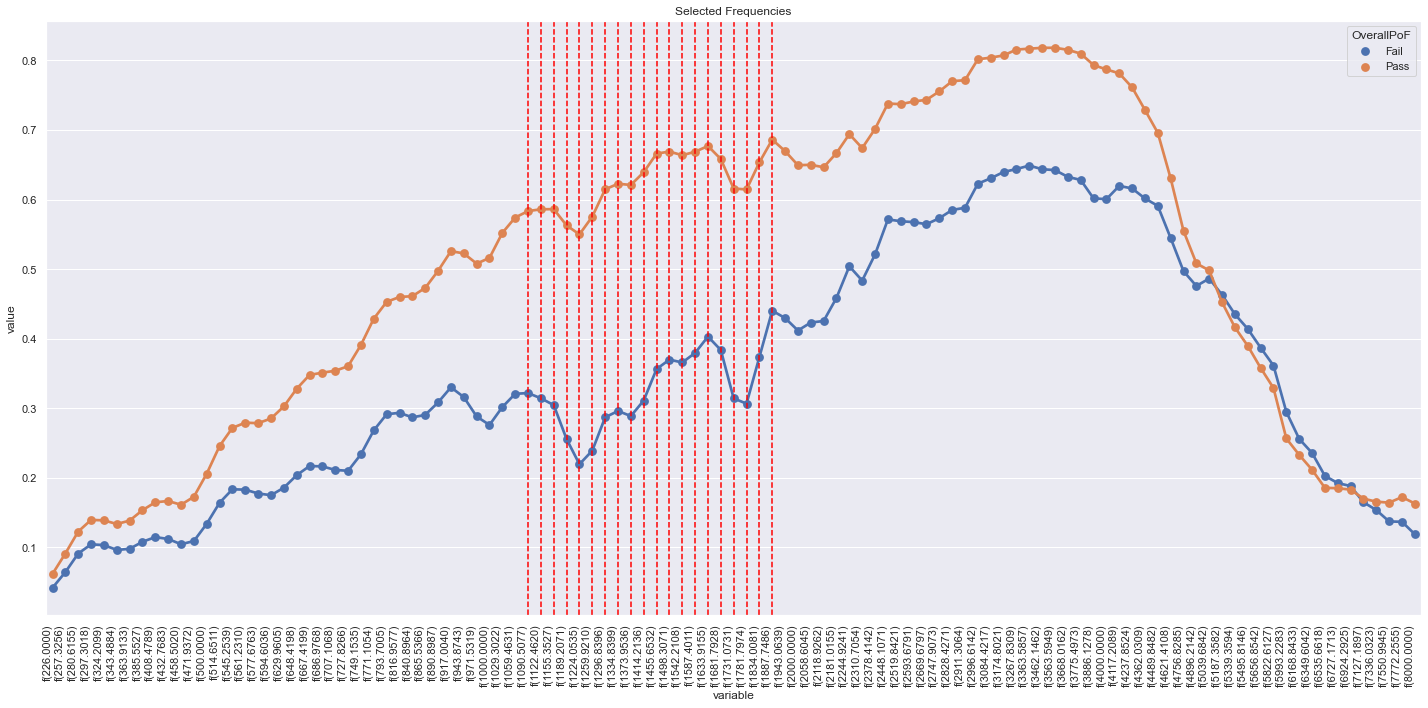

In [162]:
assess_freqs(wba_data, frequency_list, selected_columns1)

#### Select the top 25% of features.

In [163]:
selector = SelectPercentile(f_classif, percentile=25)
X_reduced = selector.fit_transform(X_train2, y_train2)
X_reduced.shape

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


(191, 27)

#### Show Result

Again, using the function get_support to generate the list of features that were kept.

In [164]:
cols = selector.get_support(indices=True)
selected_columns2 = X_train2.iloc[:,cols].columns.tolist()
selected_columns2

['f(917.0040)',
 'f(971.5319)',
 'f(1000.0000)',
 'f(1029.3022)',
 'f(1059.4631)',
 'f(1090.5077)',
 'f(1122.4620)',
 'f(1155.3527)',
 'f(1189.2071)',
 'f(1224.0535)',
 'f(1259.9210)',
 'f(1296.8396)',
 'f(1334.8399)',
 'f(1373.9536)',
 'f(1414.2136)',
 'f(1455.6532)',
 'f(1498.3071)',
 'f(1542.2108)',
 'f(1587.4011)',
 'f(1633.9155)',
 'f(1681.7928)',
 'f(1731.0731)',
 'f(1781.7974)',
 'f(1834.0081)',
 'f(1887.7486)',
 'f(1943.0639)',
 'f(2000.0000)']

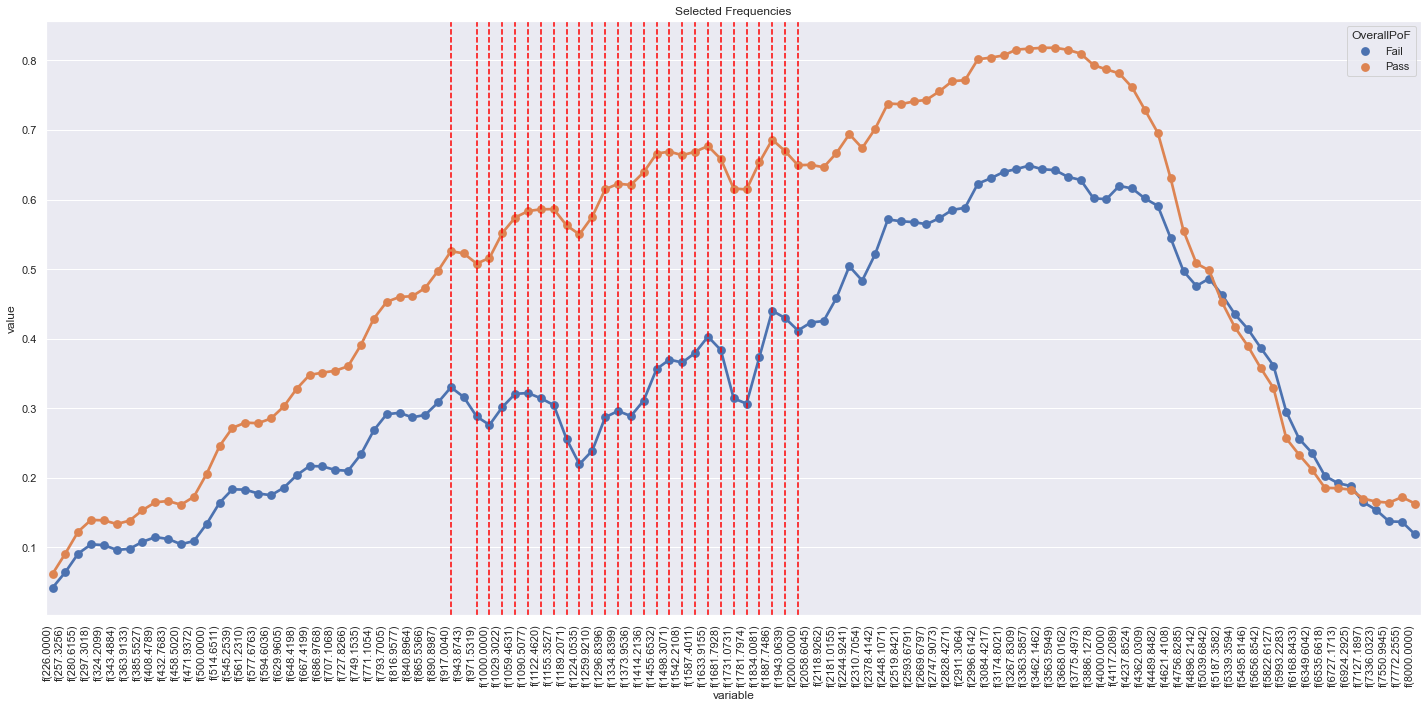

In [165]:
assess_freqs(wba_data, frequency_list, selected_columns2)

### Method4: XGBoost Feature Importance

梯度提升中的特征重要性

使用梯度提升的一个好处是，在构建提升树之后，检索每个属性的重要性分数相对简单。
通常，重要性提供一个分数，表明每个特征在构建模型内的增强决策树中的有用性或价值。使用决策树做出关键决策的属性越多，其相对重要性就越高。

为数据集中的每个属性明确计算此重要性，允许对属性进行排名和相互比较。

单个决策树的重要性是通过每个属性分割点改进性能度量的量计算的，由节点负责的观察数加权。性能度量可以是用于选择分割点的纯度（基尼指数）或另一个更具体的误差函数。
然后对模型内所有决策树的特征重要性进行平均。
经过训练的 XGBoost 模型会自动计算预测建模问题的特征重要性。

 generate feature importance plots from XGBoost using tree-based feature importance, permutation importance and shap.

#### Import

In [86]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import shap
import category_encoders as ce

import xgboost as xgb

/Users/lijiaze/opt/anaconda3/envs/cits5508/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Fitting Model

##### Encode categorical variables
We use a leave-one-out encoder as it creates a single column for each categorical variable instead of creating a column for each level of the categorical variable like one-hot-encoding. This makes interpreting the impact of categorical variables with feature impact easier.

In [167]:
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo2 = encoder.fit_transform(X_train2, y_train2)
X_test_loo2 = encoder.transform(X_test2)

##### Fit model

In [168]:
model = xgb.XGBRegressor(n_estimators=500, max_depth=5, eta=0.05)
model.fit(X_train_loo2, y_train2)

rmse = np.sqrt(mean_squared_error(y_test2, model.predict(np.ascontiguousarray(X_test_loo2))))
rmse

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.05,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0500000007, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

0.3536779600010288

#### Show Result

Plot the tree-based (or Gini) importance

<BarContainer object of 107 artists>

([<matplotlib.axis.YTick at 0x7fd23c1727c0>,
 [Text(0, 0, 'f(1498.3071)'),
  Text(0, 1, 'f(500.0000)'),
  Text(0, 2, 'f(1373.9536)'),
  Text(0, 3, 'f(2448.1071)'),
  Text(0, 4, 'f(667.4199)'),
  Text(0, 5, 'f(2669.6797)'),
  Text(0, 6, 'f(3267.8309)'),
  Text(0, 7, 'f(3084.4217)'),
  Text(0, 8, 'f(3462.1462)'),
  Text(0, 9, 'f(890.8987)'),
  Text(0, 10, 'f(1334.8399)'),
  Text(0, 11, 'f(3886.1278)'),
  Text(0, 12, 'f(4000.0000)'),
  Text(0, 13, 'f(4896.2142)'),
  Text(0, 14, 'f(865.5366)'),
  Text(0, 15, 'f(1414.2136)'),
  Text(0, 16, 'f(2996.6142)'),
  Text(0, 17, 'f(1781.7974)'),
  Text(0, 18, 'f(7550.9945)'),
  Text(0, 19, 'f(707.1068)'),
  Text(0, 20, 'f(3668.0162)'),
  Text(0, 21, 'f(686.9768)'),
  Text(0, 22, 'f(5039.6842)'),
  Text(0, 23, 'f(1633.9155)'),
  Text(0, 24, 'f(3775.4973)'),
  Text(0, 25, 'f(816.9577)'),
  Text(0, 26, 'f(4362.0309)'),
  Text(0, 27, 'f(2000.0000)'),
  Text(0, 28, 'f(7336.0323)'),
  Text(0, 29, 'f(1943.0639)'),
  Text(0, 30, 'f(545.2539)'),
  Text(0, 31

Text(0.5, 1.0, 'Feature Importance')

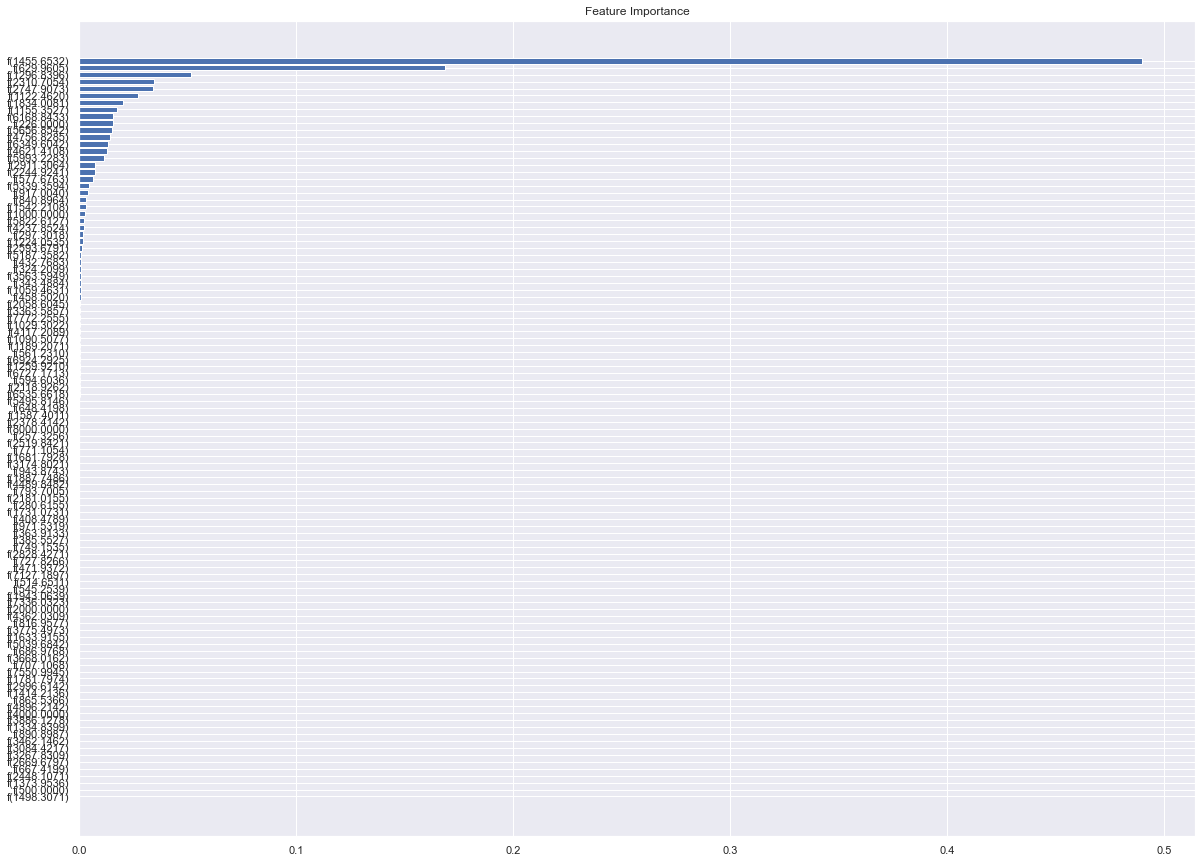

In [192]:
feature_importance = model.feature_importances_
sorted_idx1 = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 15))
plt.barh(range(len(sorted_idx1)), feature_importance[sorted_idx1], align='center')
plt.yticks(range(len(sorted_idx1)), np.array(X_test2.columns)[sorted_idx1])
plt.title('Feature Importance')

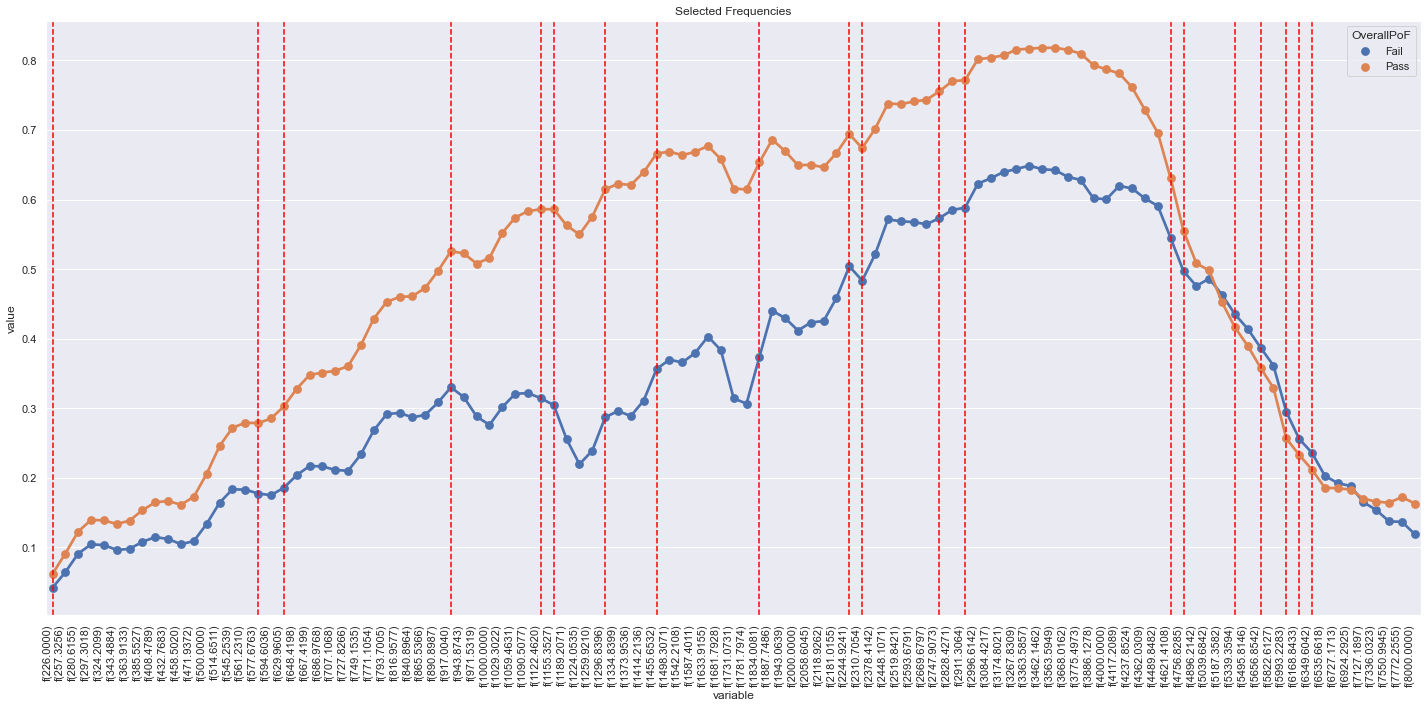

In [193]:
sorted_idx1_20=sorted_idx1[-20:]
f3_list=list(np.array(X_test2.columns)[sorted_idx1_20])
assess_freqs(wba_data, frequency_list, f3_list)

#### permutation importance.

<BarContainer object of 107 artists>

([<matplotlib.axis.YTick at 0x7fd238536460>,
 [Text(0, 0, 'f(2747.9073)'),
  Text(0, 1, 'f(1122.4620)'),
  Text(0, 2, 'f(2244.9241)'),
  Text(0, 3, 'f(5993.2283)'),
  Text(0, 4, 'f(629.9605)'),
  Text(0, 5, 'f(6168.8433)'),
  Text(0, 6, 'f(6349.6042)'),
  Text(0, 7, 'f(2911.3064)'),
  Text(0, 8, 'f(1296.8396)'),
  Text(0, 9, 'f(1542.2108)'),
  Text(0, 10, 'f(840.8964)'),
  Text(0, 11, 'f(4237.8524)'),
  Text(0, 12, 'f(2593.6791)'),
  Text(0, 13, 'f(943.8743)'),
  Text(0, 14, 'f(3563.5949)'),
  Text(0, 15, 'f(2378.4142)'),
  Text(0, 16, 'f(971.5319)'),
  Text(0, 17, 'f(1224.0535)'),
  Text(0, 18, 'f(2519.8421)'),
  Text(0, 19, 'f(648.4198)'),
  Text(0, 20, 'f(1587.4011)'),
  Text(0, 21, 'f(1731.0731)'),
  Text(0, 22, 'f(793.7005)'),
  Text(0, 23, 'f(5187.3582)'),
  Text(0, 24, 'f(1681.7928)'),
  Text(0, 25, 'f(458.5020)'),
  Text(0, 26, 'f(2828.4271)'),
  Text(0, 27, 'f(727.8266)'),
  Text(0, 28, 'f(771.1054)'),
  Text(0, 29, 'f(816.9577)'),
  Text(0, 30, 'f(865.5366)'),
  Text(0, 31, '

Text(0.5, 1.0, 'Permutation Importance')

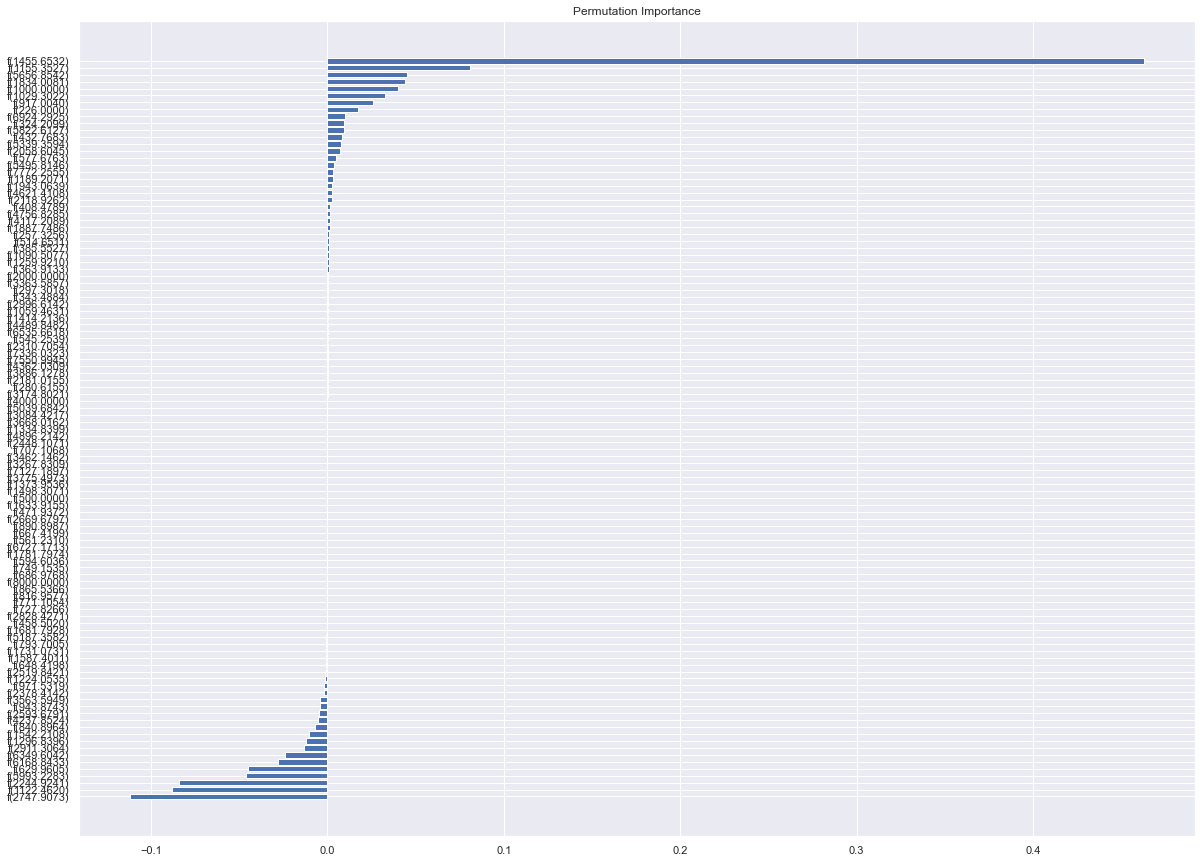

In [191]:
perm_importance = permutation_importance(model, np.ascontiguousarray(X_test_loo2), y_test2, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(20, 15))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test2.columns)[sorted_idx])
plt.title('Permutation Importance')

#### Plot the mean absolute value of the SHAP values

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


<BarContainer object of 107 artists>

([<matplotlib.axis.YTick at 0x7fd230551160>,
 [Text(0, 0, 'f(1498.3071)'),
  Text(0, 1, 'f(500.0000)'),
  Text(0, 2, 'f(1373.9536)'),
  Text(0, 3, 'f(3775.4973)'),
  Text(0, 4, 'f(4896.2142)'),
  Text(0, 5, 'f(890.8987)'),
  Text(0, 6, 'f(7127.1897)'),
  Text(0, 7, 'f(667.4199)'),
  Text(0, 8, 'f(1334.8399)'),
  Text(0, 9, 'f(3267.8309)'),
  Text(0, 10, 'f(4000.0000)'),
  Text(0, 11, 'f(2448.1071)'),
  Text(0, 12, 'f(2669.6797)'),
  Text(0, 13, 'f(3084.4217)'),
  Text(0, 14, 'f(707.1068)'),
  Text(0, 15, 'f(865.5366)'),
  Text(0, 16, 'f(1414.2136)'),
  Text(0, 17, 'f(1781.7974)'),
  Text(0, 18, 'f(686.9768)'),
  Text(0, 19, 'f(1633.9155)'),
  Text(0, 20, 'f(4362.0309)'),
  Text(0, 21, 'f(3886.1278)'),
  Text(0, 22, 'f(5039.6842)'),
  Text(0, 23, 'f(7550.9945)'),
  Text(0, 24, 'f(3668.0162)'),
  Text(0, 25, 'f(6727.1713)'),
  Text(0, 26, 'f(816.9577)'),
  Text(0, 27, 'f(7336.0323)'),
  Text(0, 28, 'f(6535.6618)'),
  Text(0, 29, 'f(3174.8021)'),
  Text(0, 30, 'f(545.2539)'),
  Text(0, 31

Text(0.5, 1.0, 'SHAP Importance')

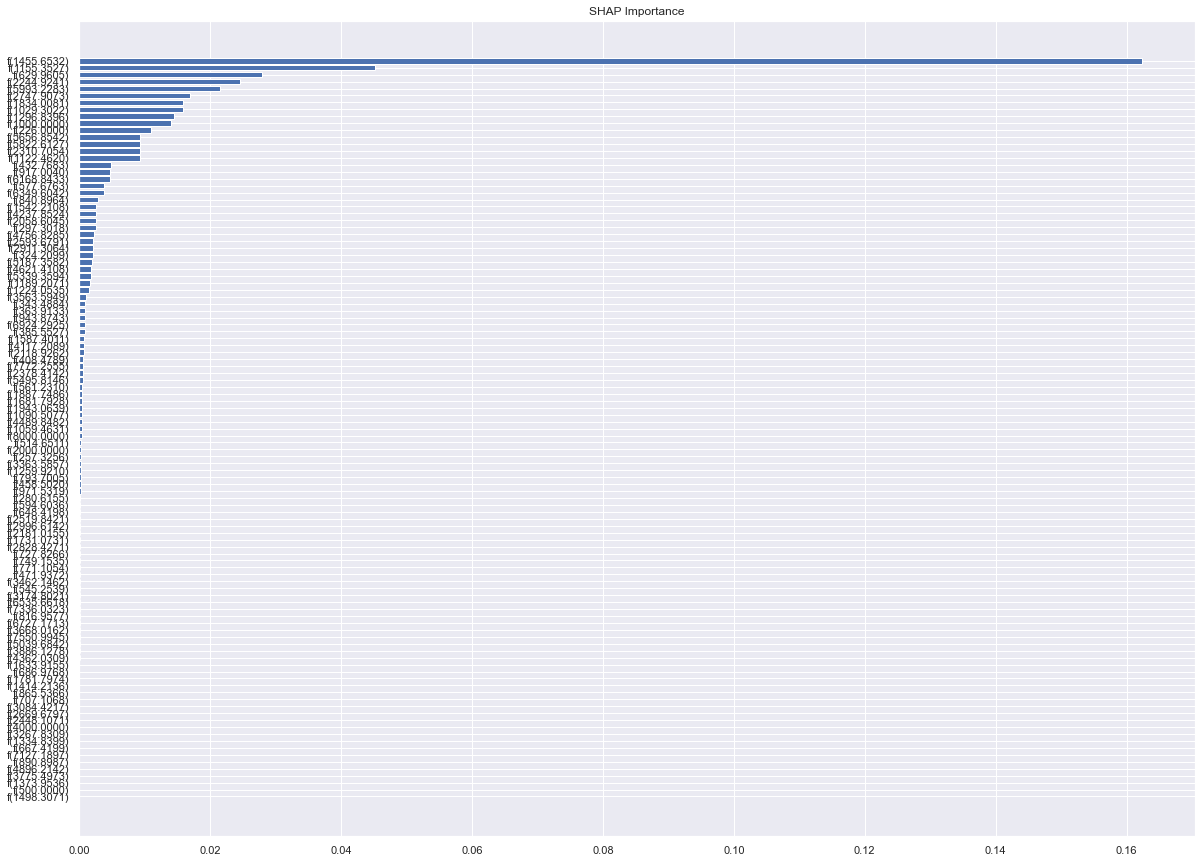

In [194]:
explainer = shap.Explainer(model)
shap_values = explainer(np.ascontiguousarray(X_test_loo2))
shap_importance = shap_values.abs.mean(0).values
sorted_idx2 = shap_importance.argsort()
fig = plt.figure(figsize=(20, 15))
plt.barh(range(len(sorted_idx2)), shap_importance[sorted_idx2], align='center')
plt.yticks(range(len(sorted_idx2)), np.array(X_test2.columns)[sorted_idx2])
plt.title('SHAP Importance')

#### Show Result

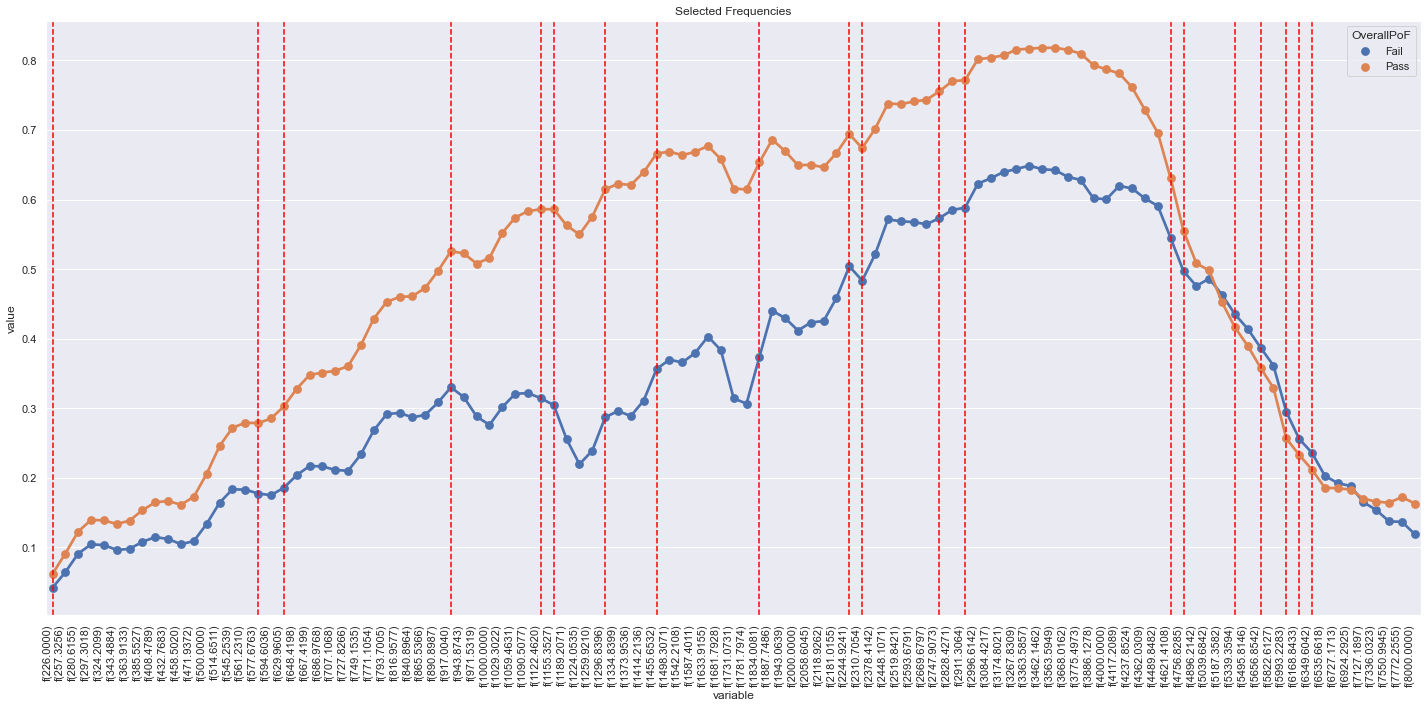

In [195]:
sorted_idx2_20=sorted_idx1[-20:]
f4_list=list(np.array(X_test2.columns)[sorted_idx2_20])
assess_freqs(wba_data, frequency_list, f4_list)

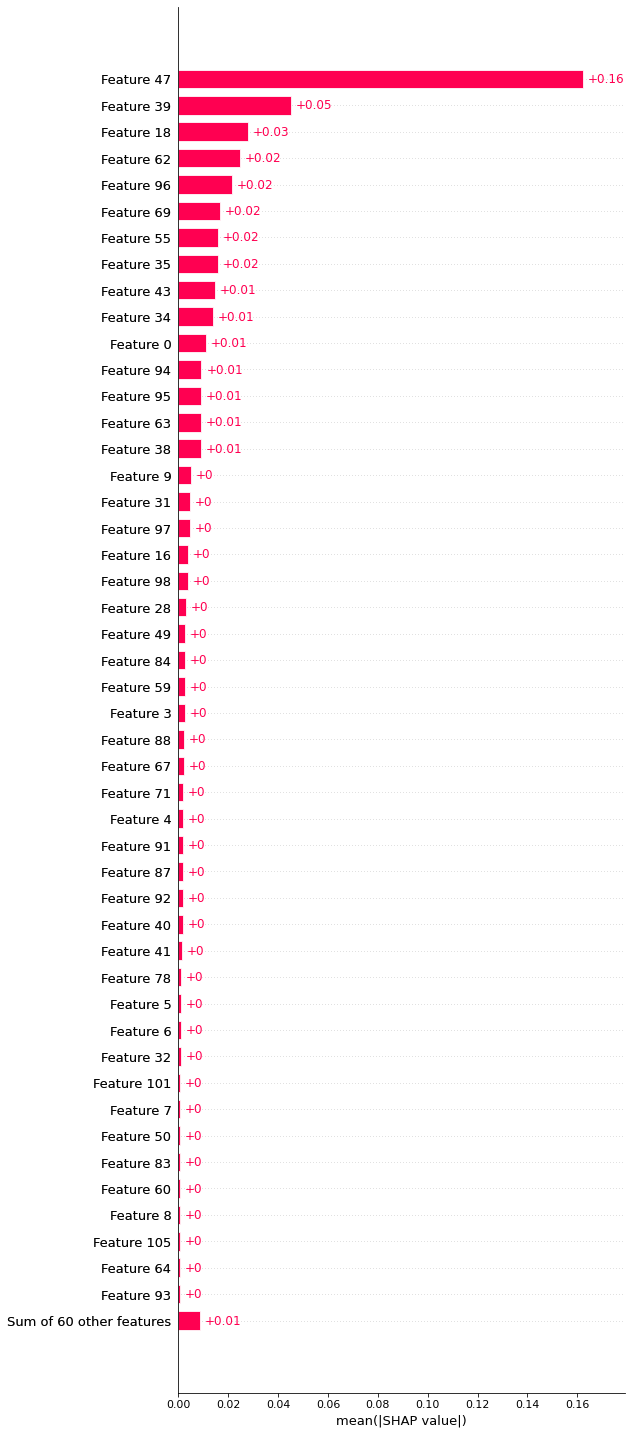

In [105]:
shap.plots.bar(shap_values, max_display=X_test_loo2.shape[0])

## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

相关性说明了特征如何相互关联或与目标变量关联。
相关性可以是正的（增加一个特征值会增加目标变量的值）或负的（增加一个特征值）特征减少目标变量的值'
Heatmap可以很容易地识别哪些特征与目标变量最相关，我们将使用seaborn。

<Figure size 1440x1440 with 0 Axes>

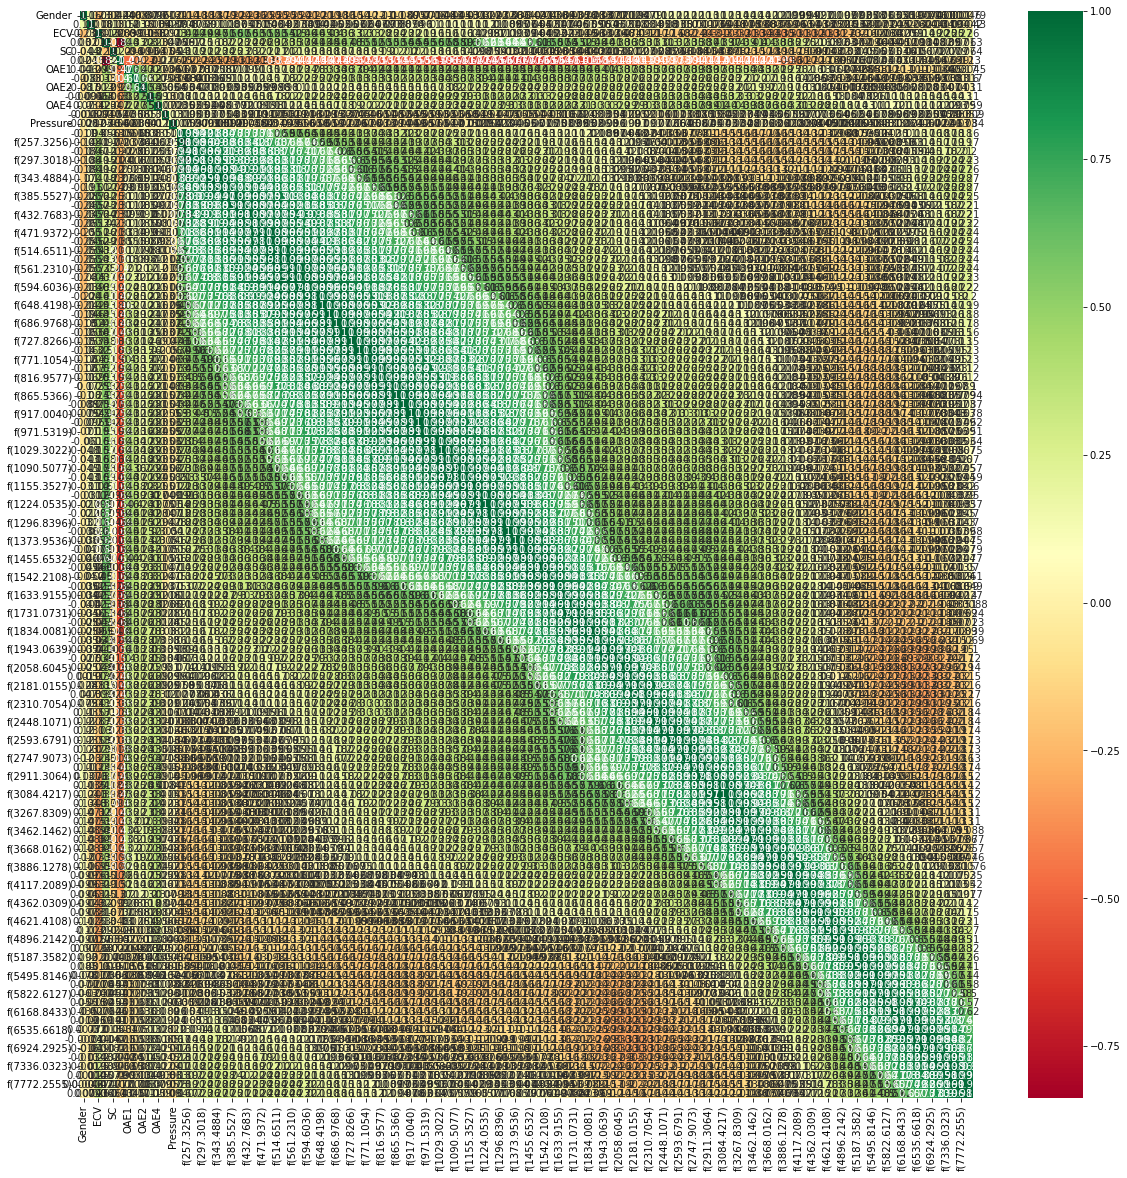

In [76]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Method1: Decision Tree and Random Forest Feature Importance

In [ ]:
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# def regressor(regressor_name,param):
#     # Parameters are tuned with GridSearchCV.
#     clf = GridSearchCV(regressor_name(n_estimators=500,max_samples=0.7, bootstrap=True),param_grid=param,cv=3)
#     clf.fit(X_train2, y_train2)#Train the regressor with the training set
#     return clf.best_params_,clf.best_score_ #To get the best result of parameter

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from dtreeviz.trees import dtreeviz

In [ ]:
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
def regressor(regressor_name,param):
    # Parameters are tuned with GridSearchCV.
    clf = GridSearchCV(regressor_name(n_estimators=500,max_samples=0.7, bootstrap=True),param_grid=param,cv=3)
    clf.fit(X_train1, y_train1)#Train the regressor with the training set
    return clf.best_params_,clf.best_score_ #To get the best result of parameter

In [ ]:
rf = RandomForestRegressor(n_estimators=500,max_samples=0.7, bootstrap=True,min_samples_leaf=2,max_features=5,random_state=42)
rf.fit(X_train1, y_train1)
score = 100 * rf.score(X_train1, y_train1)
print('Accuracy:', round(score, 2), '%.')

/var/folders/gh/kv0y6dqx7n1cx32335c_21lc0000gp/T/ipykernel_55516/1784504005.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train1, y_train1)


RandomForestRegressor(max_features=5, max_samples=0.7, min_samples_leaf=2,
                      n_estimators=500, random_state=42)

Accuracy: 83.53 %.


In [ ]:
y_train_true1,y_train_pred1=y_train1,rf.predict(X_train1)

In [ ]:
y_train_pred1

array([9.80000000e-03, 9.72666667e-01, 6.83333333e-03, 2.21333333e-02,
       7.34904762e-02, 4.05952381e-02, 5.54666667e-02, 3.28333333e-02,
       1.45000000e-02, 8.91333333e-02, 2.47800000e-01, 3.02000000e-02,
       5.99666667e-02, 1.94333333e-02, 8.81238095e-02, 1.69333333e-02,
       6.66666667e-04, 2.35000000e-02, 8.19666667e-02, 5.78666667e-02,
       9.00000000e-03, 3.23333333e-02, 1.35666667e-02, 5.66666667e-03,
       1.94004762e-01, 0.00000000e+00, 1.20000000e-02, 5.80000000e-03,
       4.78666667e-02, 6.42000000e-02, 6.53333333e-03, 2.46714286e-02,
       2.00000000e-03, 9.12233333e-01, 2.98000000e-02, 9.60500000e-01,
       7.33333333e-03, 1.63000000e-02, 4.53000000e-02, 6.50000000e-03,
       7.50000000e-03, 3.00000000e-03, 4.33000000e-02, 4.45209524e-01,
       9.38766667e-01, 9.27333333e-02, 8.57100000e-01, 2.00000000e-03,
       1.51666667e-02, 8.98633333e-01, 5.62000000e-02, 7.66666667e-03,
       3.68476190e-02, 5.19300000e-01, 6.10666667e-02, 3.08000000e-02,
      

In [ ]:
attribute_list

['Gender',
 'AgeY',
 'ECV',
 'TPP',
 'SC',
 'TympType',
 'OAE1',
 'OAE1.4',
 'OAE2',
 'OAE2.8',
 'OAE4',
 'Ear coded',
 'Pressure',
 'f(226.0000)',
 'f(257.3256)',
 'f(280.6155)',
 'f(297.3018)',
 'f(324.2099)',
 'f(343.4884)',
 'f(363.9133)',
 'f(385.5527)',
 'f(408.4789)',
 'f(432.7683)',
 'f(458.5020)',
 'f(471.9372)',
 'f(500.0000)',
 'f(514.6511)',
 'f(545.2539)',
 'f(561.2310)',
 'f(577.6763)',
 'f(594.6036)',
 'f(629.9605)',
 'f(648.4198)',
 'f(667.4199)',
 'f(686.9768)',
 'f(707.1068)',
 'f(727.8266)',
 'f(749.1535)',
 'f(771.1054)',
 'f(793.7005)',
 'f(816.9577)',
 'f(840.8964)',
 'f(865.5366)',
 'f(890.8987)',
 'f(917.0040)',
 'f(943.8743)',
 'f(971.5319)',
 'f(1000.0000)',
 'f(1029.3022)',
 'f(1059.4631)',
 'f(1090.5077)',
 'f(1122.4620)',
 'f(1155.3527)',
 'f(1189.2071)',
 'f(1224.0535)',
 'f(1259.9210)',
 'f(1296.8396)',
 'f(1334.8399)',
 'f(1373.9536)',
 'f(1414.2136)',
 'f(1455.6532)',
 'f(1498.3071)',
 'f(1542.2108)',
 'f(1587.4011)',
 'f(1633.9155)',
 'f(1681.7928)',
 

In [ ]:
# feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train1.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, attribute_list[indices[f]], importances[indices[f]]))

 1) TympType                       0.055048
 2) TPP                            0.032806
 3) f(1334.8399)                   0.032035
 4) OAE1                           0.029309
 5) f(1498.3071)                   0.028669
 6) f(1090.5077)                   0.024942
 7) f(1296.8396)                   0.024752
 8) f(1224.0535)                   0.024187
 9) f(1455.6532)                   0.023925
10) f(1059.4631)                   0.023398
11) f(1414.2136)                   0.023333
12) f(1122.4620)                   0.022652
13) f(1373.9536)                   0.022440
14) f(971.5319)                    0.021929
15) OAE2                           0.021832
16) f(1155.3527)                   0.021047
17) f(1029.3022)                   0.020542
18) f(1542.2108)                   0.019883
19) f(943.8743)                    0.018511
20) f(1259.9210)                   0.017109
21) f(1633.9155)                   0.017062
22) f(1189.2071)                   0.016317
23) f(1731.0731)                

In [ ]:
# # feature importance
# importances = rf.feature_importances_
# indices = np.argsort(importances)[::-1]
# for f in range(X_train2.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30, frequency_list[indices[f]], importances[indices[f]]))

 1) f(343.4884)                                        0.055048
 2) f(297.3018)                                        0.032806
 3) f(1943.0639)                                       0.032035
 4) f(363.9133)                                        0.029309
 5) f(2181.0155)                                       0.028669
 6) f(1587.4011)                                       0.024942
 7) f(1887.7486)                                       0.024752
 8) f(1781.7974)                                       0.024187
 9) f(2118.9262)                                       0.023925
10) f(1542.2108)                                       0.023398
11) f(2058.6045)                                       0.023333
12) f(1633.9155)                                       0.022652
13) f(2000.0000)                                       0.022440
14) f(1414.2136)                                       0.021929
15) f(408.4789)                                        0.021832
16) f(1681.7928)                        

IndexError: list index out of range